In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os
import sys
import warnings
warnings.filterwarnings('ignore')

In [2]:
titanic_train =pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Regression/Logistic Regression/Titanic_train.csv")

titanic_test =pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Regression/Logistic Regression/Titanic_test.csv")

In [3]:
# Check duplicate data (when we merge 2 tables, there might be common data in both datasets)

# But we didnt find any duplicate data because it is seperated by passengerid

In [4]:
titanic_train.duplicated().sum()

0

In [5]:
titanic_test.duplicated().sum()

0

In [6]:
titanic_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
print(titanic_train.shape, titanic_test.shape)

(891, 12) (418, 11)


In [9]:
titanic_train['data'] = 'train'
titanic_test['data'] = 'test'

In [10]:
print(titanic_train.shape, titanic_test.shape)

(891, 13) (418, 12)


In [11]:
all_data = pd.concat([titanic_train, titanic_test ],axis =0)

In [12]:
all_data.shape

(1309, 13)

In [13]:
all_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [14]:
all_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,test
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,test


# Data Preprocessing
## Part1 -Missing Values

In [15]:
all_data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data              0
dtype: int64

In [16]:
all_data.isnull().sum()/len(all_data)*100

PassengerId     0.000000
Survived       31.932773
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.091673
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.076394
Cabin          77.463713
Embarked        0.152788
data            0.000000
dtype: float64

In [17]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  data         1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [18]:
all_data=all_data.drop(['PassengerId','Name','Cabin','Ticket','Fare'],axis=1)


In [19]:
all_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,data
0,0.0,3,male,22.0,1,0,S,train
1,1.0,1,female,38.0,1,0,C,train
2,1.0,3,female,26.0,0,0,S,train
3,1.0,1,female,35.0,1,0,S,train
4,0.0,3,male,35.0,0,0,S,train


In [20]:
all_data.isnull().any()

Survived     True
Pclass      False
Sex         False
Age          True
SibSp       False
Parch       False
Embarked     True
data        False
dtype: bool

In [21]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1307 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [22]:
all_data.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,1309.000000,1046.000000,1309.000000,1309.000000
mean,0.383838,2.294882,29.881138,0.498854,0.385027
std,0.486592,0.837836,14.413493,1.041658,0.865560
min,0.000000,1.000000,0.170000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,9.000000


<AxesSubplot:ylabel='Age'>

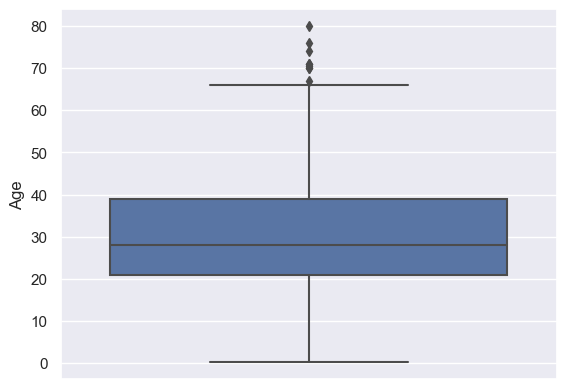

In [23]:
sns.boxplot(y ='Age',data = all_data)

In [24]:
all_data['Age'] = all_data['Age'].fillna(all_data['Age'].median())

In [25]:
all_data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [26]:
all_data['Embarked'] = all_data['Embarked'].fillna('S')

In [27]:
all_data.isnull().sum()

Survived    418
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Embarked      0
data          0
dtype: int64

In [28]:
# check each column to see is there in any discrepency in the value

In [29]:
for i in all_data:
    print("************************************",i,"*************************")
    print()
    print(set(all_data[i].tolist()))

************************************ Survived *************************

{0.0, 1.0, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [30]:
for i in all_data:
    print("************************************",i,"*************************")
    print()
    print(set(all_data[i].unique()))

************************************ Survived *************************

{0.0, 1.0, nan}
************************************ Pclass *************************

{1, 2, 3}
************************************ Sex *************************

{'male', 'female'}
************************************ Age *************************

{0.75, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 28.5, 31.0, 32.0, 30.0, 34.0, 35.0, 33.0, 37.0, 38.0, 39.0, 40.0, 32.5, 42.0, 36.5, 40.5, 45.0, 46.0, 47.0, 44.0, 49.0, 50.0, 51.0, 45.5, 52.0, 54.0, 55.0, 55.5, 56.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 60.5, 70.5, 71.0, 14.5, 70.0, 74.0, 76.0, 80.0, 18.5, 20.5, 22.5, 23.5, 24.5, 0.42, 26.5, 30.5, 34.5, 36.0, 0.17, 38.5, 41.0, 43.0, 48.0, 0.83, 0.92, 0.67, 53.0, 11.5, 57.0, 0.33}
************************************ SibSp *************************

{0, 1, 2, 3, 4, 5, 8}
***

## Part 2 -Encoding

In [31]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1309 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Embarked  1309 non-null   object 
 7   data      1309 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 92.0+ KB


In [32]:
print(all_data['Sex'].value_counts())
print()
print(all_data['Embarked'].value_counts())
print()
print(all_data['Pclass'].value_counts())

male      843
female    466
Name: Sex, dtype: int64

S    916
C    270
Q    123
Name: Embarked, dtype: int64

3    709
1    323
2    277
Name: Pclass, dtype: int64


In [33]:
all_data['Sex'] = all_data['Sex'].astype('category')
all_data['Sex'] = all_data['Sex'].cat.codes

In [34]:
all_data = pd.get_dummies(all_data, columns = ['Embarked','Pclass'])

# here pclass seems to be in number(1,2,3) but actually its class-1,class-2,class-3
   # so we have to change it to number

In [35]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,0,1,0,0,1
1,1.0,0,38.0,1,0,train,1,0,0,1,0,0
2,1.0,0,26.0,0,0,train,0,0,1,0,0,1
3,1.0,0,35.0,1,0,train,0,0,1,1,0,0
4,0.0,1,35.0,0,0,train,0,0,1,0,0,1


In [36]:
# dummy variable(n-1)
all_data = all_data.drop(['Embarked_C','Pclass_1'],axis = 1)

In [37]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,1,0,0
4,0.0,1,35.0,0,0,train,0,1,0,1


In [38]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    float64
 1   Sex         1309 non-null   int8   
 2   Age         1309 non-null   float64
 3   SibSp       1309 non-null   int64  
 4   Parch       1309 non-null   int64  
 5   data        1309 non-null   object 
 6   Embarked_Q  1309 non-null   uint8  
 7   Embarked_S  1309 non-null   uint8  
 8   Pclass_2    1309 non-null   uint8  
 9   Pclass_3    1309 non-null   uint8  
dtypes: float64(2), int64(2), int8(1), object(1), uint8(4)
memory usage: 67.8+ KB


## Part 3 - Outlier Handling

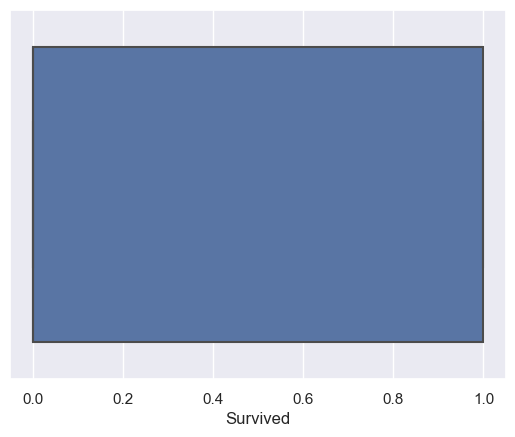

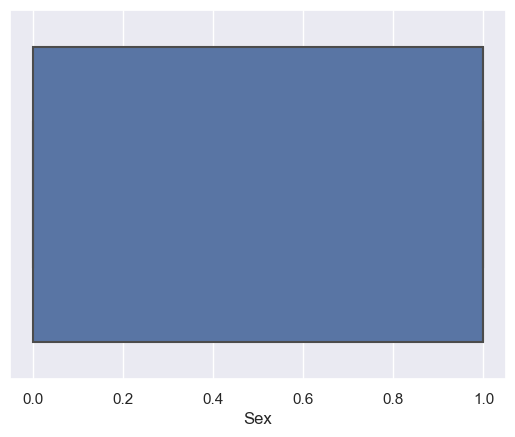

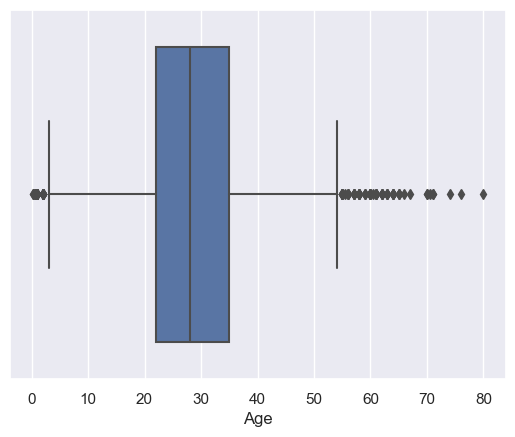

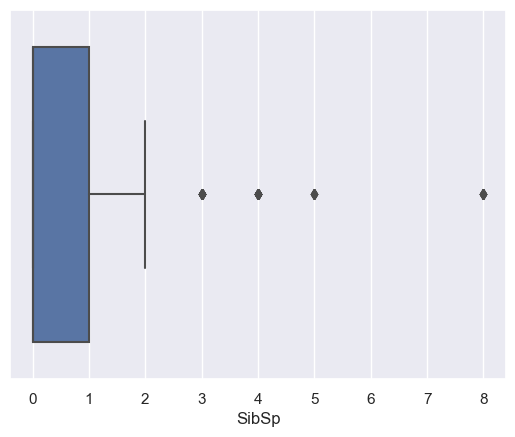

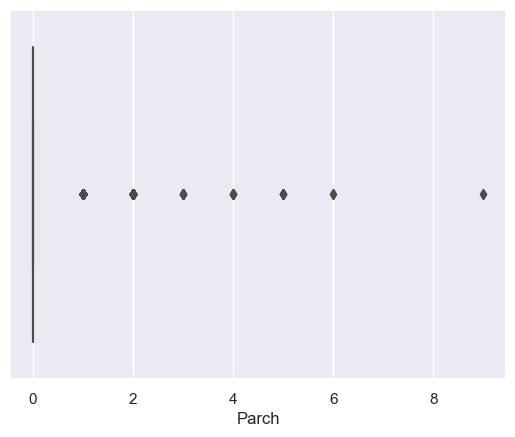

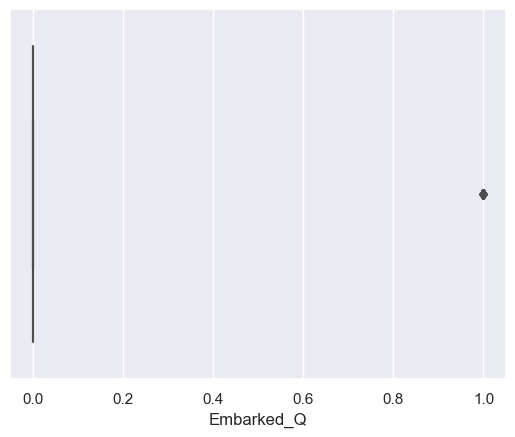

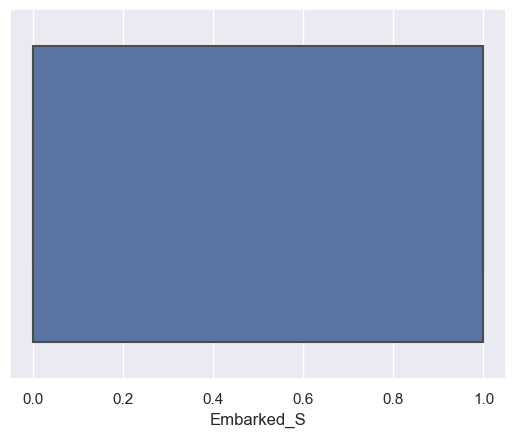

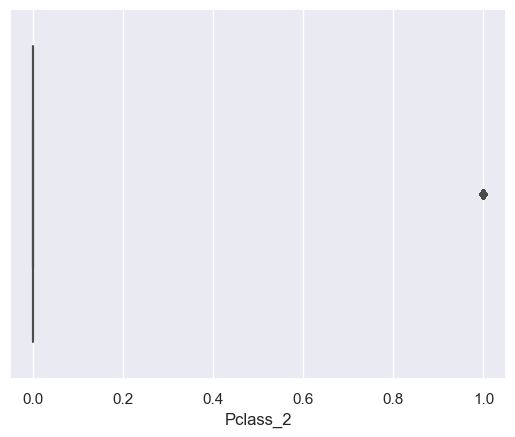

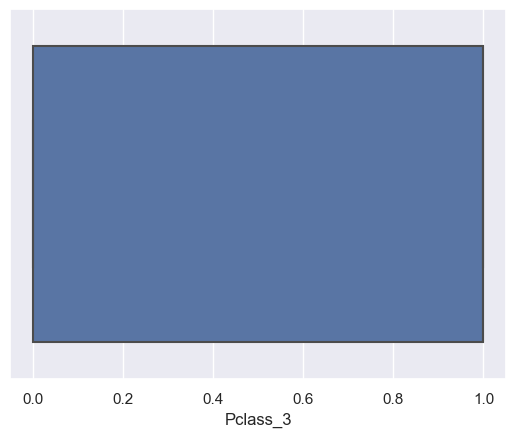

In [39]:
def boxplot(col):
    sns.boxplot(all_data[col])
    plt.show()
    
for i in list(all_data.select_dtypes(exclude = ['object']).columns)[0:]:
    boxplot(i)

In [40]:
# Outllier treatment is not require because 
# Age-age above 55 and below 4 required special attention, if we treat outlier method then they will come to 55(UL) & 4(LL),
      # the we may not able to find out whether they are resuced first or not
    
# SibSp - more than 2 should not consider as outliers as the value 2 is very less
# Parch - family of more than 1 is considering as outliers, which is completely wrong
# Embarked_Q - 1 should not consider as outlier
# Pclass_2 - same as above because the values lies b/w 0-1

## Part 4 - Feature Scaling

In [41]:
all_data.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,1,0,0
4,0.0,1,35.0,0,0,train,0,1,0,1


In [42]:
all_data1 = all_data.copy()
all_data1.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,1,0,0
4,0.0,1,35.0,0,0,train,0,1,0,1


In [43]:
# In Classification problem Featue Scaling is not required
# Even though after seeing the above data, all the points are in 0&1 except age(even it has max value of 80)
# so Feature Scaling is not required 

# Even if we do, there wont be much improvement in result

## Part 5 -Imbalance Dataset

In [44]:
all_data.duplicated().sum()

439

AxesSubplot(0.125,0.11;0.775x0.77)


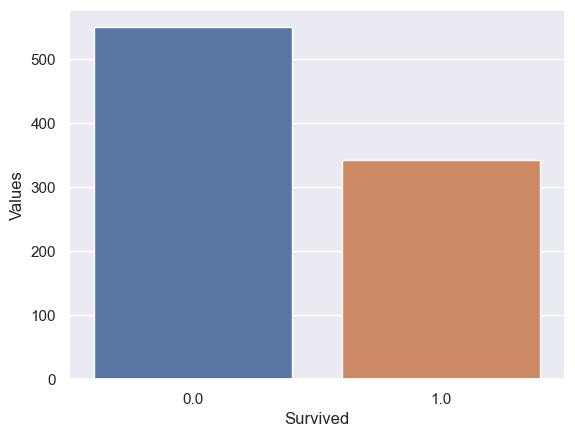

In [45]:
temp = all_data['Survived'].value_counts()
temp_df = pd.DataFrame({'Survived':temp.index, 'Values':temp.values})
print(sns.barplot(x = 'Survived', y = 'Values', data = temp_df))
plt.show()

In [46]:
# so the data is balance dataset or else we can see in another way

all_data['Survived'].value_counts()

0.0    549
1.0    342
Name: Survived, dtype: int64

### Preprocessing part completed

## EDA- Exploratory Data Analysis

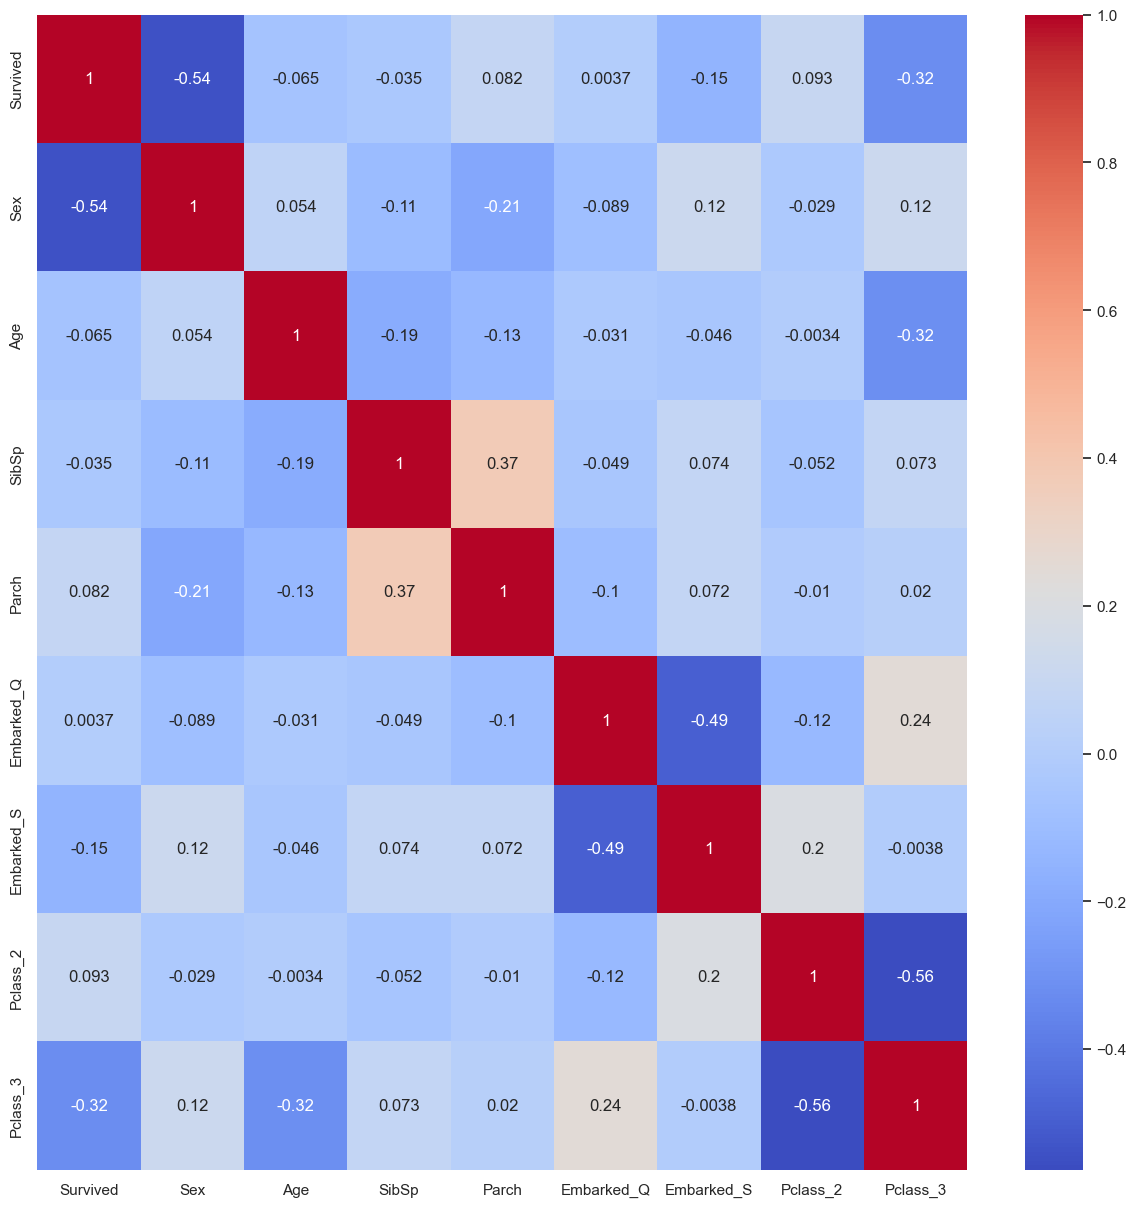

In [47]:
plt.figure(figsize = (15,15))
sns.heatmap(all_data.corr(), annot = True, cmap = 'coolwarm' )
plt.show()

In [48]:
# Advance EDA method1 -Pandas Profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(all_data)
prof.to_file(output_file = "EDA for titanic_dataset")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [172]:
# Advance EDA method 2 - DTALE 

#!pip install dtale

In [50]:
import dtale
import dtale.app as dtale_app

In [51]:
dtale.show(all_data)

## split the train data and test seperately

In [52]:
all_data.head(2)

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0


In [53]:
train = all_data[all_data['data']=='train']
test = all_data[all_data['data']=='test']

In [54]:
print(all_data.shape)
print()
print(train.shape)
print()
print(test.shape)



(1309, 10)

(891, 10)

(418, 10)


In [55]:
train.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0.0,1,22.0,1,0,train,0,1,0,1
1,1.0,0,38.0,1,0,train,0,0,0,0
2,1.0,0,26.0,0,0,train,0,1,0,1
3,1.0,0,35.0,1,0,train,0,1,0,0
4,0.0,1,35.0,0,0,train,0,1,0,1


In [56]:
train.isnull().sum()

Survived      0
Sex           0
Age           0
SibSp         0
Parch         0
data          0
Embarked_Q    0
Embarked_S    0
Pclass_2      0
Pclass_3      0
dtype: int64

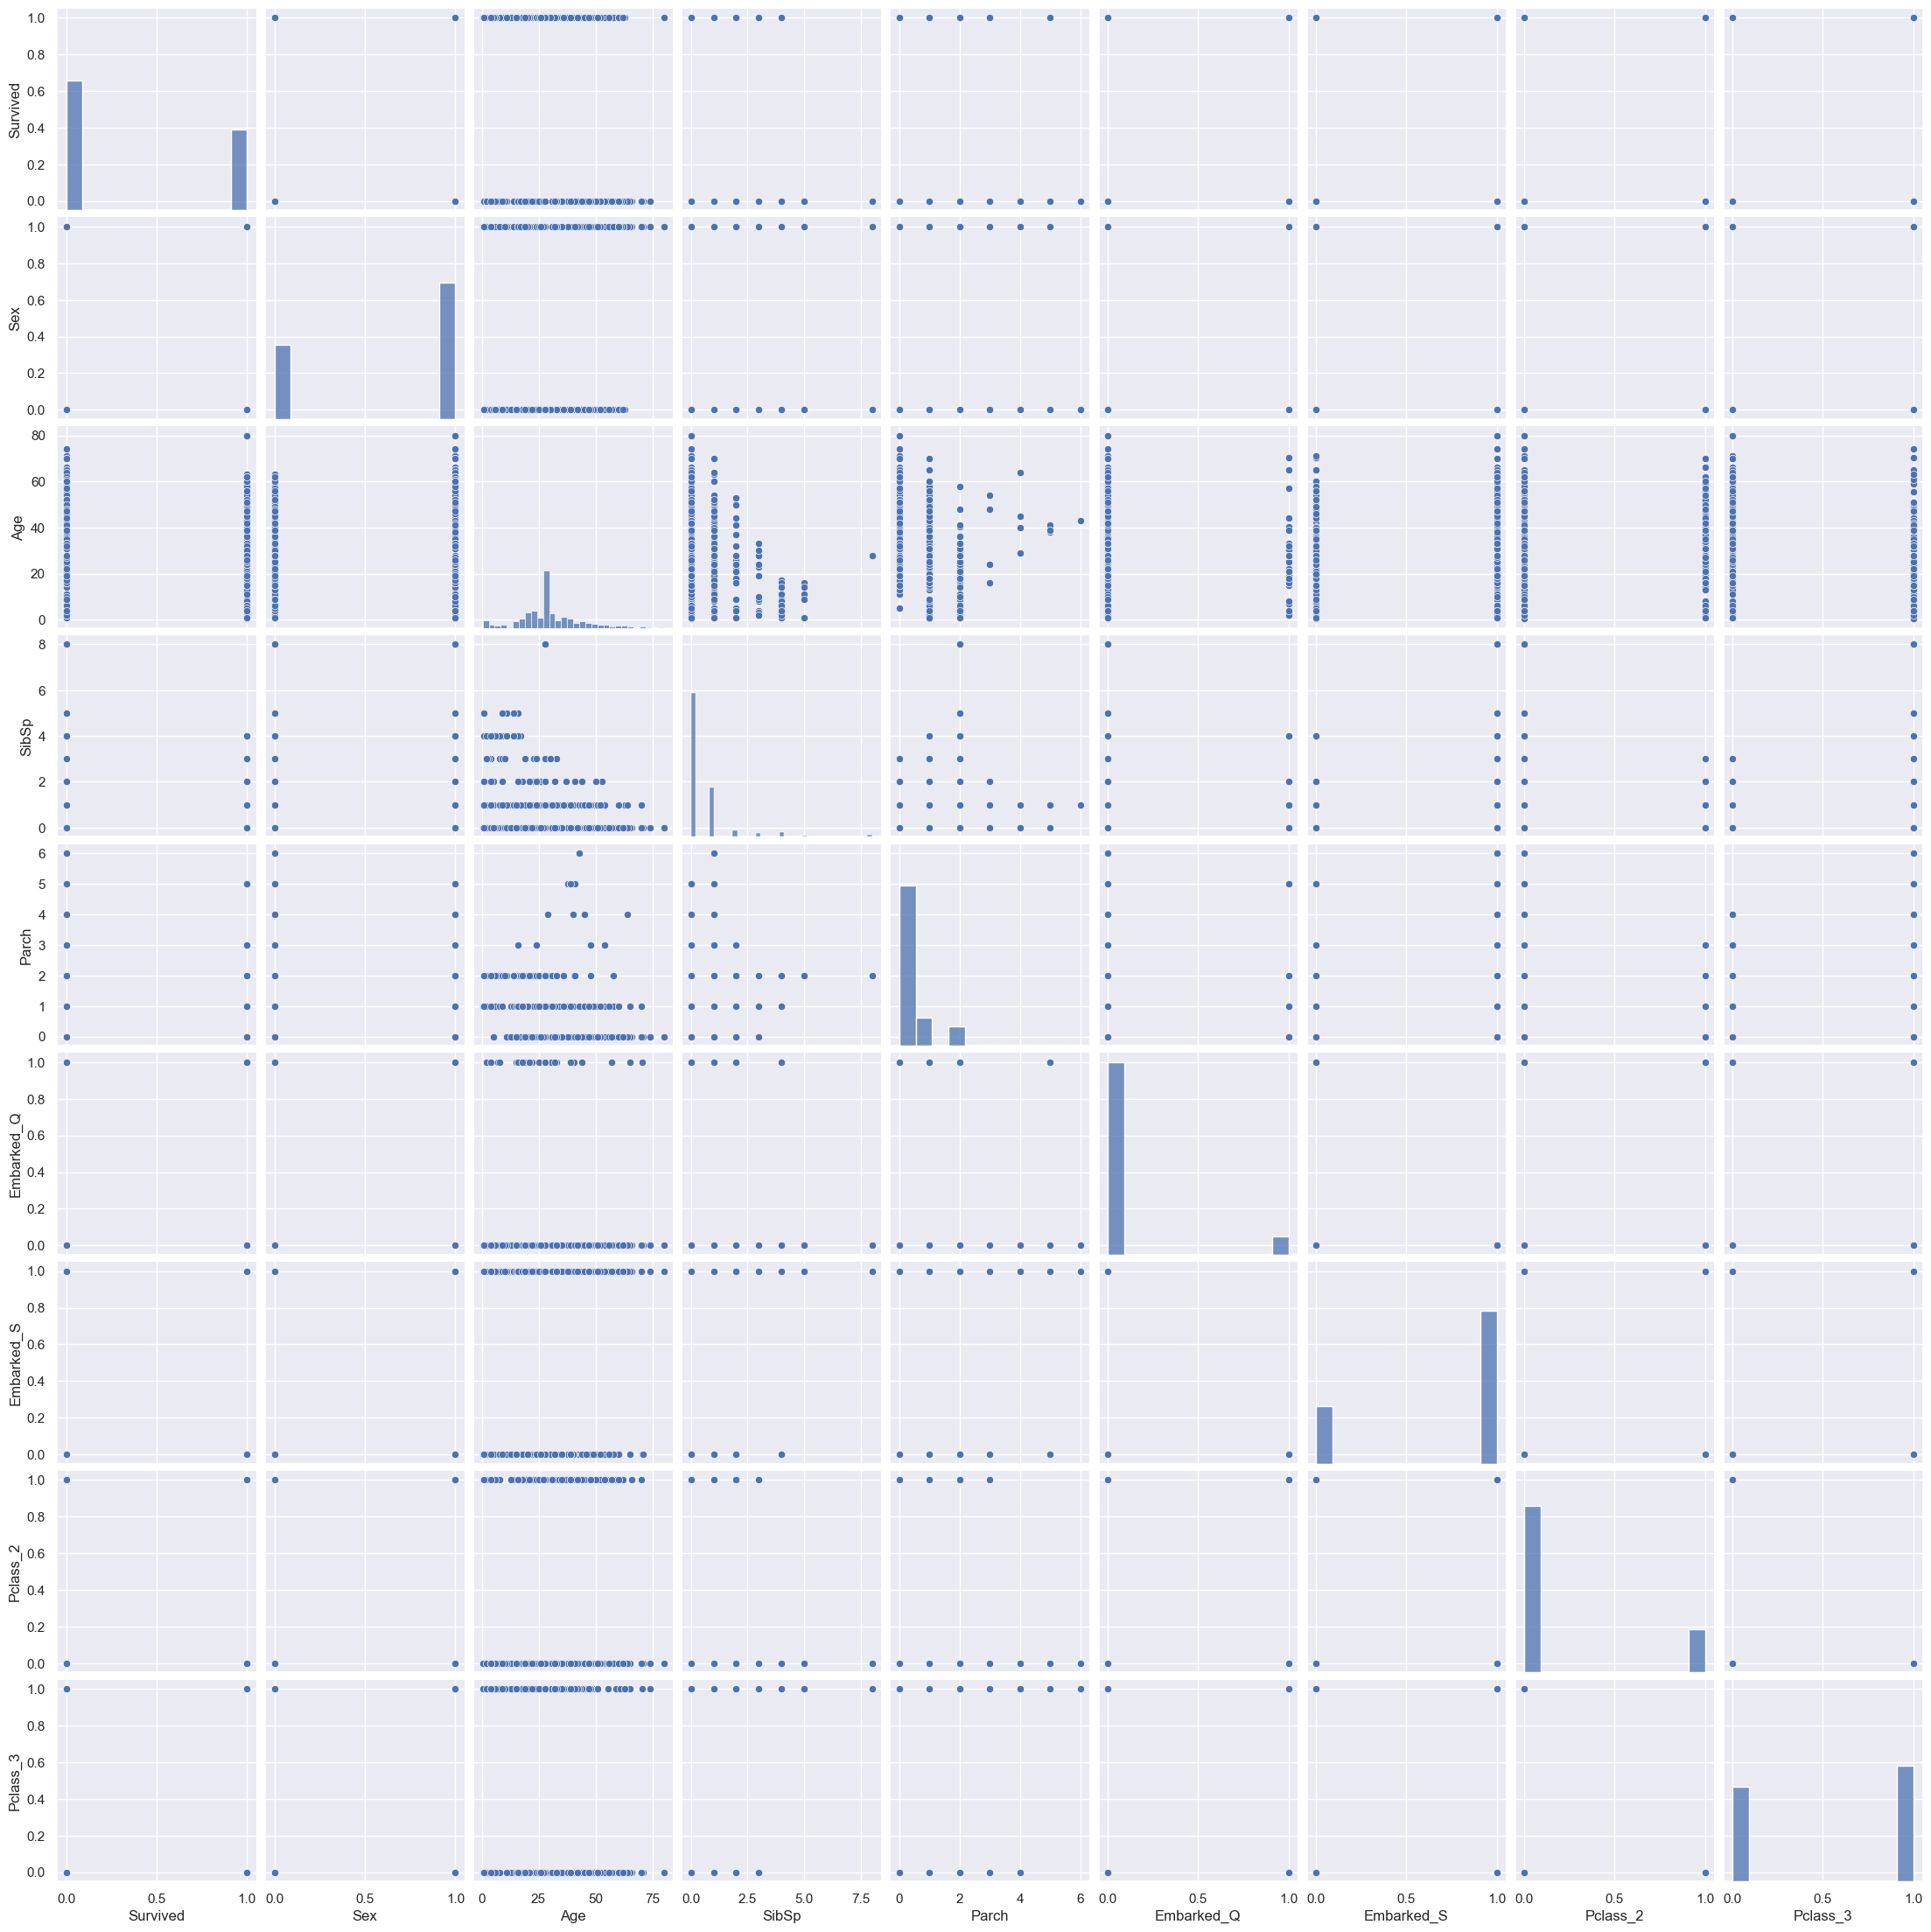

In [137]:
sns.pairplot(train)

In [57]:
# split the data into independent and dependent variable

x = train.drop(['Survived', 'data'],axis = 1)
y = train.iloc[:,0]

In [58]:
x.head()

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,22.0,1,0,0,1,0,1
1,0,38.0,1,0,0,0,0,0
2,0,26.0,0,0,0,1,0,1
3,0,35.0,1,0,0,1,0,0
4,1,35.0,0,0,0,1,0,1


In [59]:
pd.DataFrame(y).head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [60]:
test.head()

,Survived,Sex,Age,SibSp,Parch,data,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,NaN,1,34.5,0,0,test,1,0,0,1
1,NaN,0,47.0,1,0,test,0,1,0,1
2,NaN,1,62.0,0,0,test,1,0,1,0
3,NaN,1,27.0,0,0,test,0,1,0,1
4,NaN,0,22.0,1,1,test,0,1,0,1


In [61]:
test.isnull().sum()

Survived      418
Sex             0
Age             0
SibSp           0
Parch           0
data            0
Embarked_Q      0
Embarked_S      0
Pclass_2        0
Pclass_3        0
dtype: int64

In [62]:
test =test.drop(['Survived','data'],axis = 1)
# test data is for checking model performance
test.head()

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [63]:
# we have to build model and prediction with x and y dataset
# split the data into training and testing
# when we have imabalance dependent variable, we can use stratify

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25, random_state = 1,
                                                stratify = y)

## Building Logistic Regression with Binary Class

In [64]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)

LogisticRegression()

In [66]:
# predicting overfitting or underfitting problem

y_pred_train = logit_model.predict(x_train)
y_pred_test = logit_model.predict(x_test)

In [69]:
pd.DataFrame(y_test)

,Survived
391,1.0
584,0.0
610,0.0
261,1.0
496,1.0
...,...
434,0.0
331,0.0
559,1.0
376,1.0


In [70]:
y_pred_test

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       1., 1.])

In [72]:
# Evaluate the model
 
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# Classification_report mean precision,recall,f1score


In [76]:
print(classification_report(y_train,y_pred_train))
print("***********"*5)
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

         0.0       0.83      0.88      0.85       412
         1.0       0.78      0.70      0.74       256

    accuracy                           0.81       668
   macro avg       0.80      0.79      0.80       668
weighted avg       0.81      0.81      0.81       668

*******************************************************
              precision    recall  f1-score   support

         0.0       0.82      0.87      0.84       137
         1.0       0.77      0.69      0.72        86

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [75]:
# above anwser tell about confusion matrix
# for training [[TN FN] \n [FP TP]]

# similary for testing [[TN FN] \n [FP TP]]

In [77]:
print(accuracy_score(y_train,y_pred_train))
print("***********"*5)
print(accuracy_score(y_test,y_pred_test))

0.811377245508982
*******************************************************
0.7982062780269058


## Cross Validataion

In [78]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_model,x_train,y_train,cv = 10)
test_accuracy = cross_val_score(logit_model,x_test,y_test,cv = 10)

print("Training Accuracy:", training_accuracy)
print()
print("Training Mean Accuracy:", training_accuracy.mean())
print()
print("Training Max Accuracy:", training_accuracy.max())
print()
print("Test Accuracy:", test_accuracy)
print()
print("Test Mean Accuracy:", test_accuracy.mean())
print()
print("Test Max Accuracy:", test_accuracy.max())


Training Accuracy: [0.8358209  0.74626866 0.7761194  0.7761194  0.82089552 0.8358209
 0.85074627 0.7761194  0.83333333 0.8030303 ]

Training Mean Accuracy: 0.8054274084124831

Training Max Accuracy: 0.8507462686567164

Test Accuracy: [0.73913043 0.86956522 0.56521739 0.77272727 0.95454545 0.68181818
 0.95454545 0.81818182 0.86363636 0.86363636]

Test Mean Accuracy: 0.808300395256917

Test Max Accuracy: 0.9545454545454546


2023-08-04 20:19:01,487 - INFO     - Executing shutdown due to inactivity...
2023-08-04 20:19:09,699 - INFO     - Executing shutdown...
2023-08-04 20:19:09,706 - ERROR    - Exception on /shutdown [GET]
Traceback (most recent call last):
  File "C:\Users\achyu\anaconda3\lib\site-packages\flask\app.py", line 2529, in wsgi_app
    response = self.full_dispatch_request()
  File "C:\Users\achyu\anaconda3\lib\site-packages\flask\app.py", line 1825, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "C:\Users\achyu\anaconda3\lib\site-packages\flask\app.py", line 1823, in full_dispatch_request
    rv = self.dispatch_request()
  File "C:\Users\achyu\anaconda3\lib\site-packages\flask\app.py", line 1799, in dispatch_request
    return self.ensure_sync(self.view_functions[rule.endpoint])(**view_args)
  File "C:\Users\achyu\anaconda3\lib\site-packages\dtale\app.py", line 440, in shutdown
    shutdown_server()
  File "C:\Users\achyu\anaconda3\lib\site-packages\dtale\app.py", line

## ROC and AUC 

In [80]:
from sklearn.metrics import roc_auc_score
logistic_roc_auc = roc_auc_score(y_test,y_pred_test)
logistic_roc_auc

0.7773298251570191

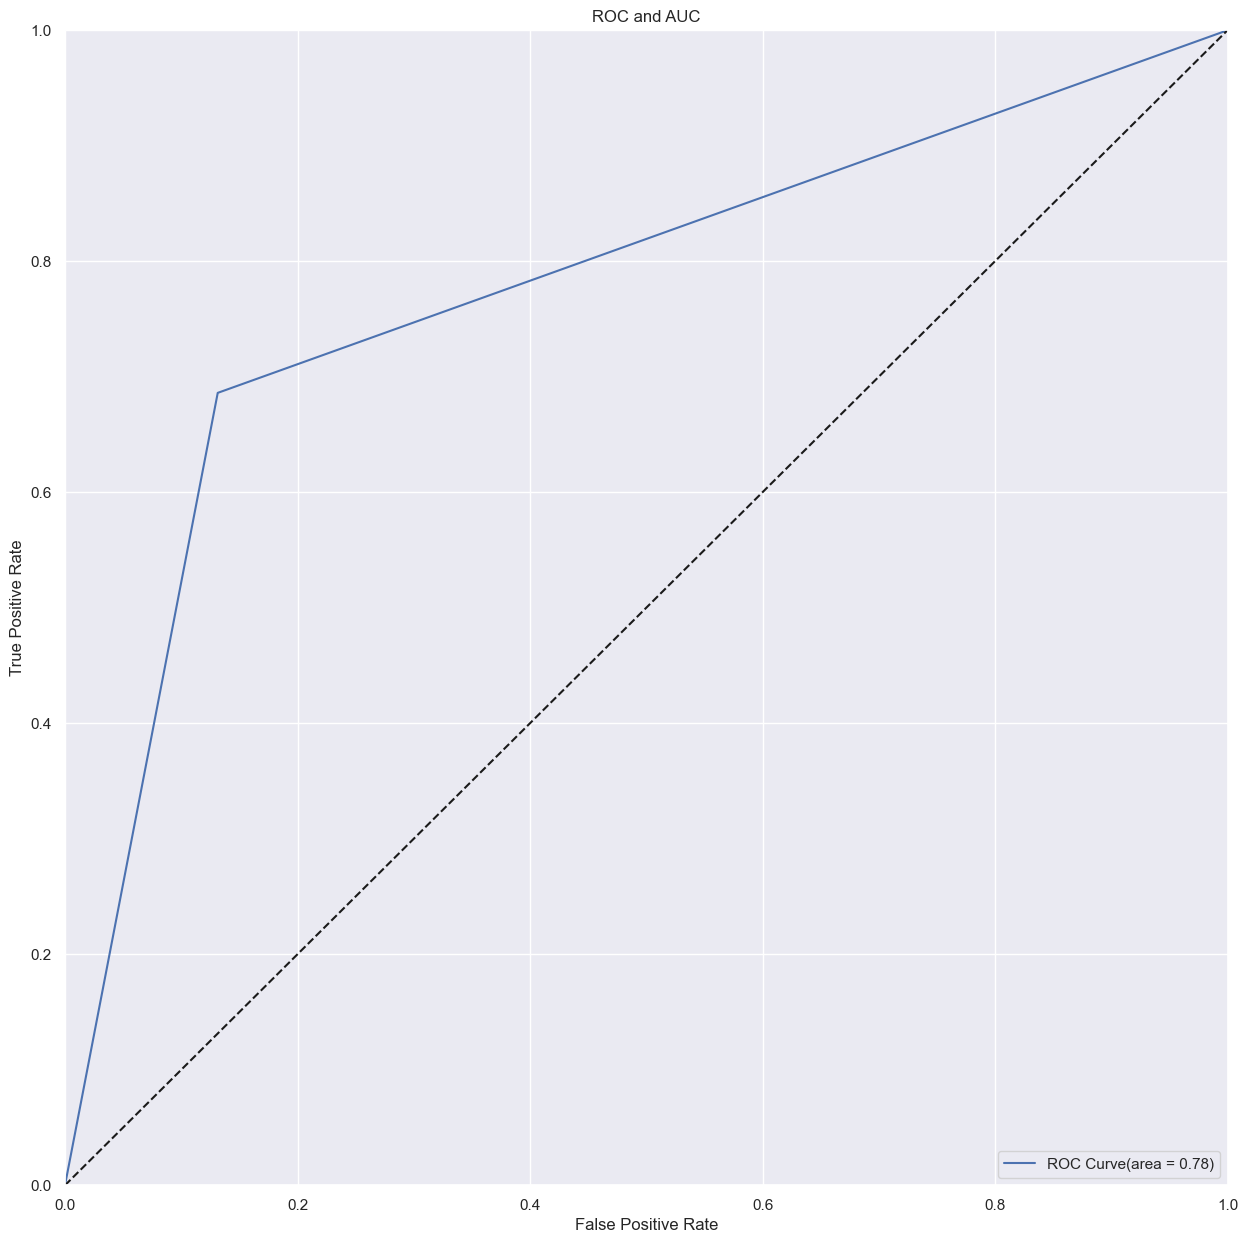

In [82]:
from sklearn.metrics import roc_curve
fpr,tpr, thresholds = roc_curve(y_test,y_pred_test)

plt.figure(figsize = (15,15))
plt.plot(fpr, tpr, label = "ROC Curve(area = %0.2f)" %logistic_roc_auc)
plt.plot([0,1],[0,1],'k--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC and AUC")
plt.legend(loc = "lower right")
plt.show()

## Final part - Predict the result for test dataset where we dont have "survived" column

In [84]:
test.head()

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,34.5,0,0,1,0,0,1
1,0,47.0,1,0,0,1,0,1
2,1,62.0,0,0,1,0,1,0
3,1,27.0,0,0,0,1,0,1
4,0,22.0,1,1,0,1,0,1


In [85]:
final_result = logit_model.predict(test)

In [86]:
final_result

array([0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1.,
       0., 1., 0., 1., 1.

In [89]:
final_result_1 = pd.concat([test,pd.DataFrame(final_result)],axis = 1)

In [90]:
final_result_1

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,0
0,1,34.5,0,0,1,0,0,1,0.0
1,0,47.0,1,0,0,1,0,1,0.0
2,1,62.0,0,0,1,0,1,0,0.0
3,1,27.0,0,0,0,1,0,1,0.0
4,0,22.0,1,1,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,1,28.0,0,0,0,1,0,1,0.0
414,0,39.0,0,0,0,0,0,0,1.0
415,1,38.5,0,0,0,1,0,1,0.0
416,1,28.0,0,0,0,1,0,1,0.0


In [91]:
final_result_1 = final_result_1.rename(columns = {0:'Survived'})

In [92]:
final_result_1

,Sex,Age,SibSp,Parch,Embarked_Q,Embarked_S,Pclass_2,Pclass_3,Survived
0,1,34.5,0,0,1,0,0,1,0.0
1,0,47.0,1,0,0,1,0,1,0.0
2,1,62.0,0,0,1,0,1,0,0.0
3,1,27.0,0,0,0,1,0,1,0.0
4,0,22.0,1,1,0,1,0,1,1.0
...,...,...,...,...,...,...,...,...,...
413,1,28.0,0,0,0,1,0,1,0.0
414,0,39.0,0,0,0,0,0,0,1.0
415,1,38.5,0,0,0,1,0,1,0.0
416,1,28.0,0,0,0,1,0,1,0.0


In [100]:
final_result_2 = final_result_1[['Survived']]

In [101]:
final_result_2.head()

,Survived
0,0.0
1,0.0
2,0.0
3,0.0
4,1.0


In [102]:
titanic_test1.shape

(418, 11)

In [93]:
titanic_test1 =pd.read_csv("D:/Learnbay/Stats & ML by Kumar Sundaram Sir/Notes/ML/Regression/Logistic Regression/Titanic_test.csv")



In [103]:
final_result_2.shape

(418, 1)

In [104]:
titanic_test_submission = pd.concat([titanic_test1,final_result_2],axis=1)

In [105]:
titanic_test_submission.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0


In [115]:
titanic_test_submission.to_csv("Final_Titanic_Test_Output.csv")

In [113]:
titanic_test_submission1 = titanic_test_submission[['PassengerId','Survived']]


In [114]:
titanic_test_submission1

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0
...,...,...
413,1305,0.0
414,1306,1.0
415,1307,0.0
416,1308,0.0


## ******* The END ***************

###  Just for information -Sigmoid Function formula = 1/(1+e^-y)
    

In [116]:
import numpy as np

In [130]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [131]:
sigmoid(1)

0.7310585786300049

In [132]:
sigmoid(100)

1.0

In [133]:
sigmoid(-200)

1.3838965267367376e-87

In [134]:
# Lets plot the sigmoid curve

xvalue = np.linspace(-100,100,1000)
xvalue

array([-100.        ,  -99.7997998 ,  -99.5995996 ,  -99.3993994 ,
        -99.1991992 ,  -98.998999  ,  -98.7987988 ,  -98.5985986 ,
        -98.3983984 ,  -98.1981982 ,  -97.997998  ,  -97.7977978 ,
        -97.5975976 ,  -97.3973974 ,  -97.1971972 ,  -96.996997  ,
        -96.7967968 ,  -96.5965966 ,  -96.3963964 ,  -96.1961962 ,
        -95.995996  ,  -95.7957958 ,  -95.5955956 ,  -95.3953954 ,
        -95.1951952 ,  -94.99499499,  -94.79479479,  -94.59459459,
        -94.39439439,  -94.19419419,  -93.99399399,  -93.79379379,
        -93.59359359,  -93.39339339,  -93.19319319,  -92.99299299,
        -92.79279279,  -92.59259259,  -92.39239239,  -92.19219219,
        -91.99199199,  -91.79179179,  -91.59159159,  -91.39139139,
        -91.19119119,  -90.99099099,  -90.79079079,  -90.59059059,
        -90.39039039,  -90.19019019,  -89.98998999,  -89.78978979,
        -89.58958959,  -89.38938939,  -89.18918919,  -88.98898899,
        -88.78878879,  -88.58858859,  -88.38838839,  -88.18818

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

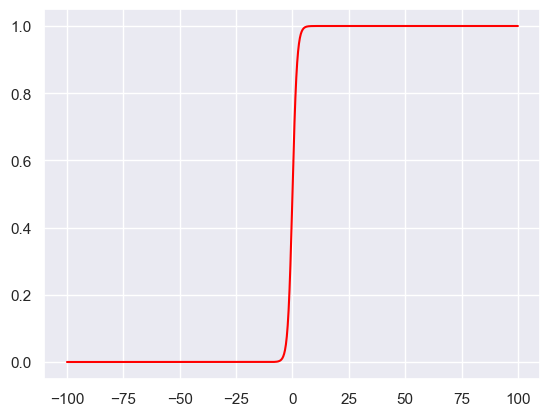

In [136]:
plt.plot(xvalue, sigmoid(xvalue),color = 'red')
plt.show()

# Multi Class Classification Problem

## IRIS Dataset

In [139]:
import seaborn as sns
df = sns.load_dataset('iris')
df.head()

# here seaborn has inbuilt iris dataset, that's why without giving the path, we got data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [140]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [142]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['species'] = encode.fit_transform(df['species'])

In [146]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [147]:
df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [163]:
# Here OHE is not required, because when we use multiclass classification,
  # it will do automatically inside 
# When we use OVA or OVR we have to use Label Encoder only    
    

In [148]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [150]:
df = df[['sepal_length','petal_length','species']]

In [151]:
df.head()

,sepal_length,petal_length,species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


In [152]:
# split the data into x and y

x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [153]:
x.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [154]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [155]:
# split the data into train and test

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 1)

# Building Logistic Regression with Multiclass Classification
## Method 1- OVR or OVA

In [157]:
# multi_class : {'auto','ovr','multinomial'}
logit_ovr = LogisticRegression(multi_class = 'ovr')
logit_ovr.fit(x_train, y_train)

LogisticRegression(multi_class='ovr')

In [158]:
#  Predict

y_pred_ovr_train = logit_ovr.predict(x_train)
y_pred_ovr_test = logit_ovr.predict(x_test)

In [159]:
# Evaluate the model
print(confusion_matrix(y_train, y_pred_ovr_train))
print()
print(confusion_matrix(y_test,y_pred_ovr_test))


[[37  0  0]
 [ 0 26  8]
 [ 0  0 41]]

[[13  0  0]
 [ 1 11  4]
 [ 0  0  9]]


In [160]:
print(classification_report(y_train, y_pred_ovr_train))
print()
print(classification_report(y_test,y_pred_ovr_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      0.76      0.87        34
           2       0.84      1.00      0.91        41

    accuracy                           0.93       112
   macro avg       0.95      0.92      0.93       112
weighted avg       0.94      0.93      0.93       112


              precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       1.00      0.69      0.81        16
           2       0.69      1.00      0.82         9

    accuracy                           0.87        38
   macro avg       0.87      0.90      0.87        38
weighted avg       0.90      0.87      0.87        38



In [161]:
print(accuracy_score(y_train, y_pred_ovr_train))
print()
print(accuracy_score(y_test,y_pred_ovr_test))

0.9285714285714286

0.868421052631579


In [164]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(logit_ovr,x_train,y_train,cv = 10)
test_accuracy = cross_val_score(logit_ovr,x_test,y_test,cv = 10)

print("Training Accuracy:", training_accuracy)
print()
print("Training Mean Accuracy:", training_accuracy.mean())
print()
print("Training Max Accuracy:", training_accuracy.max())
print()
print("Test Accuracy:", test_accuracy)
print()
print("Test Mean Accuracy:", test_accuracy.mean())
print()
print("Test Max Accuracy:", test_accuracy.max())


Training Accuracy: [0.83333333 0.91666667 0.90909091 1.         0.90909091 0.81818182
 1.         0.81818182 0.81818182 0.90909091]

Training Mean Accuracy: 0.8931818181818182

Training Max Accuracy: 1.0

Test Accuracy: [1.         1.         1.         1.         1.         0.75
 0.75       0.75       1.         0.66666667]

Test Mean Accuracy: 0.8916666666666666

Test Max Accuracy: 1.0


# Method 2 - Multinomial Classification

In [165]:
# multi_class : {'auto','ovr','multinomial'}
logit_multi = LogisticRegression(multi_class = 'multinomial')
logit_multi.fit(x_train,y_train)

LogisticRegression(multi_class='multinomial')

In [166]:
# predict

y_pred_multi_train = logit_multi.predict(x_train)
y_pred_multi_test = logit_multi.predict(x_test)

In [169]:
# Evaluate the model

print(confusion_matrix(y_train,y_pred_multi_train))
print()
print(confusion_matrix(y_test, y_pred_multi_test))

[[37  0  0]
 [ 0 31  3]
 [ 0  1 40]]

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [170]:
# Evaluate the model

print(classification_report(y_train,y_pred_multi_train))
print()
print(classification_report(y_test,y_pred_multi_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      0.91      0.94        34
           2       0.93      0.98      0.95        41

    accuracy                           0.96       112
   macro avg       0.97      0.96      0.96       112
weighted avg       0.96      0.96      0.96       112


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [171]:
# Evaluate the model

print(accuracy_score(y_train,y_pred_multi_train))
print()
print(accuracy_score(y_test,y_pred_multi_test))

0.9642857142857143

0.9736842105263158
